In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
df = pd.read_csv('titanic.csv')
print(df.head())
print(df.sample(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [188]:
print(df.dtypes)
print(df.size)
print(df.shape)
print(df.columns)
print(df.describe())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
10692
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000

In [189]:
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [190]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Cabin'].fillna(df['Cabin'].ffill(),inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1664\225900475.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1664\225900475.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [191]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [192]:
df = df.drop('PassengerId',axis=1)
df = df.drop('Name',axis=1)
df = df.drop('Ticket',axis=1)


In [193]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes 

df['Embarked'] = df['Embarked'].astype('category')
df['Embarked'] = df['Embarked'].cat.codes 

In [194]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
142,1,3,0,24.0,1,0,15.8500,B86,2
113,0,3,0,20.0,1,0,9.8250,C110,2
306,1,1,0,28.0,0,0,110.8833,C22 C26,0
423,0,3,0,28.0,1,1,14.4000,C78,2
230,1,1,0,35.0,1,0,83.4750,C83,2


In [195]:
# from sklearn.preprocessing import MaxAbsScaler
# df[['Age','Fare']] = MaxAbsScaler().fit_transform(df[['Age','Fare']])

In [196]:
# from sklearn.preprocessing import PowerTransformer
# df['Fare'] = PowerTransformer().fit_transform(df['Fare'].values.reshape(-1,1))

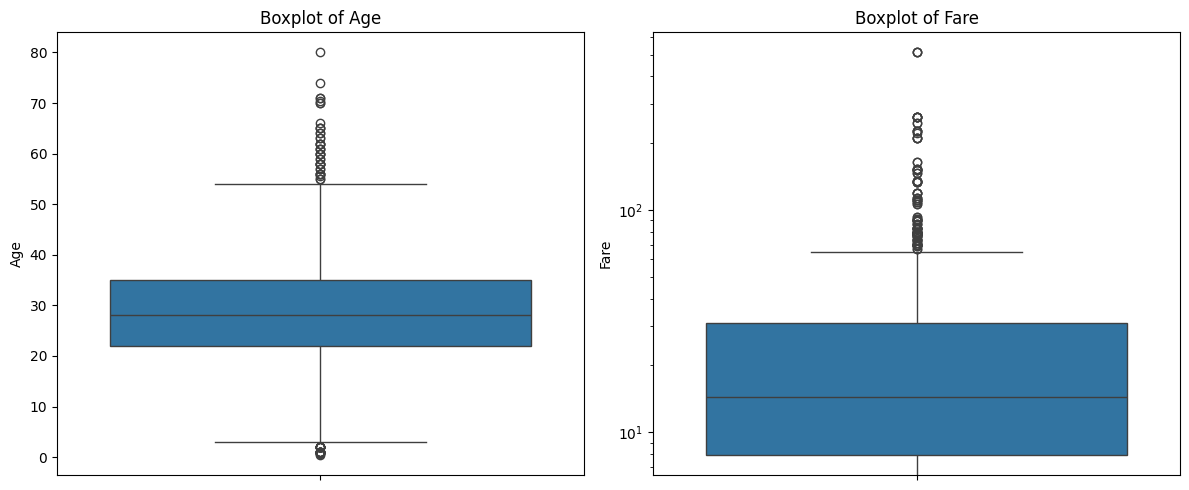

In [204]:
# One variable (Age and Fare)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(ax=axes[0],data=df, y='Age')
axes[0].set_title('Boxplot of Age')

sns.boxplot(data=df, y='Fare', ax=axes[1])
axes[1].set_title('Boxplot of Fare')
axes[1].set_yscale('log')  # Set log scale for Fare
plt.tight_layout()
plt.show()

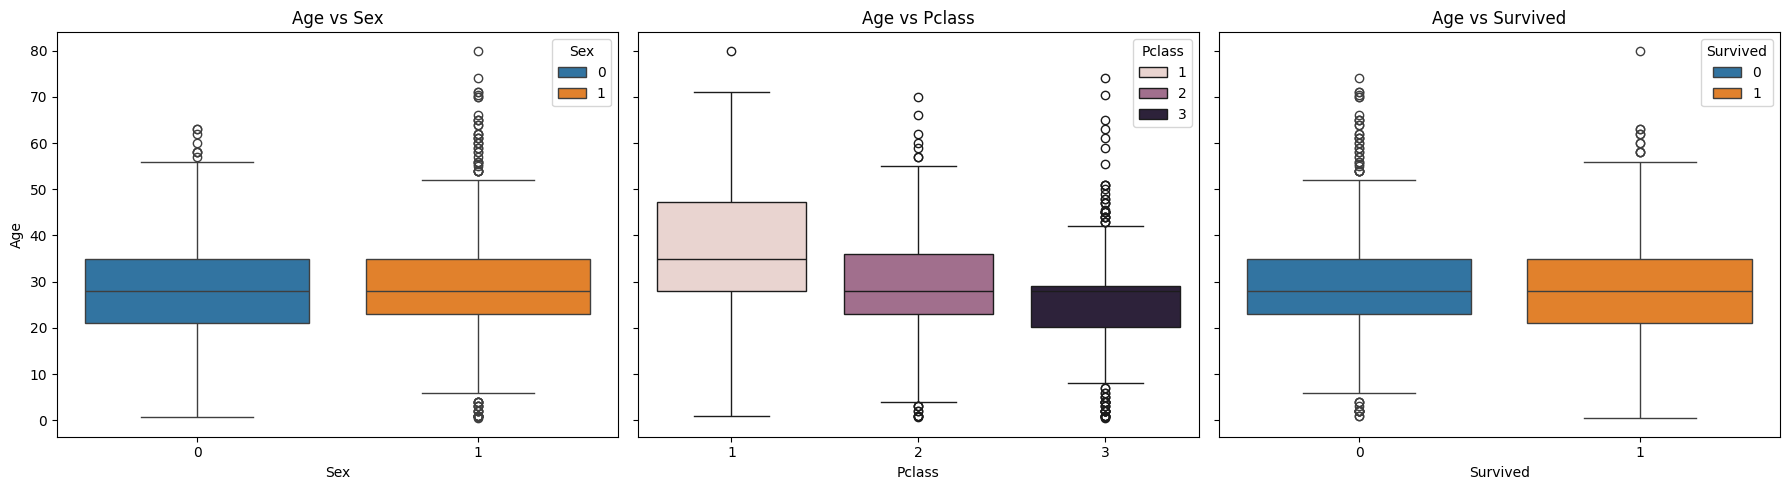

In [198]:
# Two variables (Age)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
sns.boxplot(data=df, x='Sex', y='Age', hue='Sex', ax=axes[0])
axes[0].set_title('Age vs Sex')

sns.boxplot(data=df, x='Pclass', y='Age', hue='Pclass', ax=axes[1])
axes[1].set_title('Age vs Pclass')

sns.boxplot(data=df, x='Survived', y='Age', hue='Survived', ax=axes[2])
axes[2].set_title('Age vs Survived')

plt.tight_layout()
plt.show()

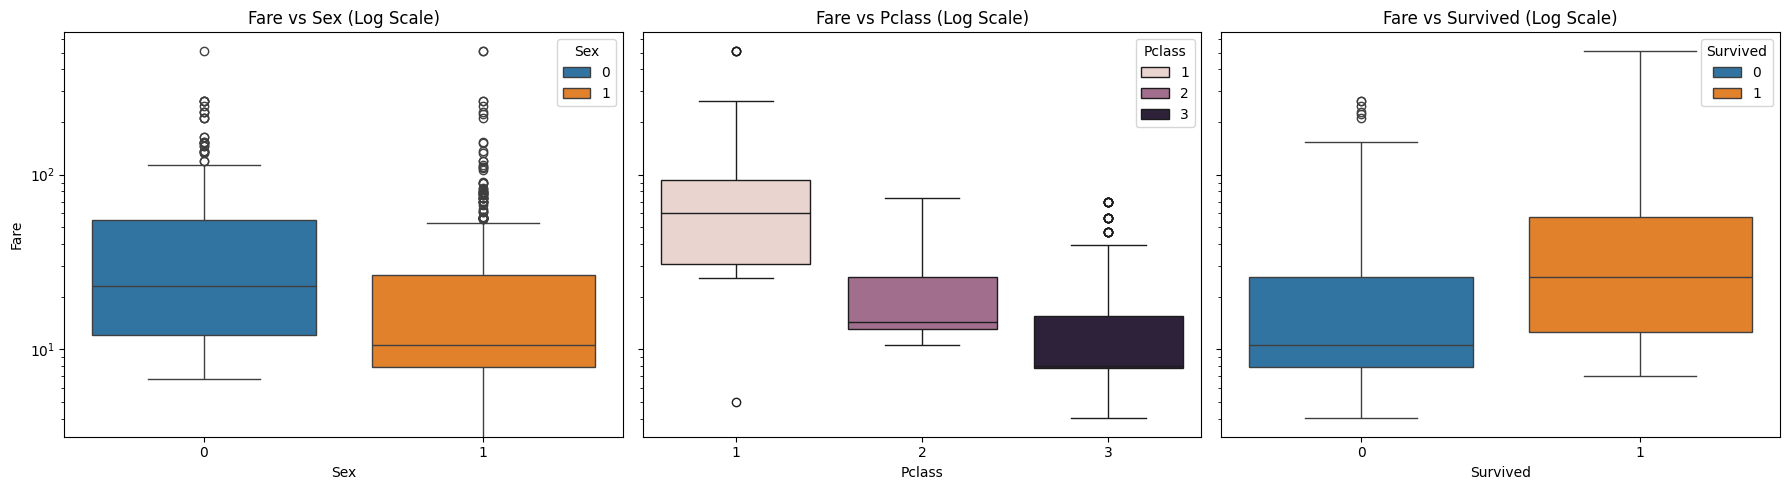

In [199]:
# Two variables (Fare)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
sns.boxplot(data=df, x='Sex', y='Fare', hue='Sex', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Fare vs Sex (Log Scale)')

sns.boxplot(data=df, x='Pclass', y='Fare', hue='Pclass', ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Fare vs Pclass (Log Scale)')

sns.boxplot(data=df, x='Survived', y='Fare', hue='Survived', ax=axes[2])
axes[2].set_yscale('log')
axes[2].set_title('Fare vs Survived (Log Scale)')

plt.tight_layout()
plt.show()

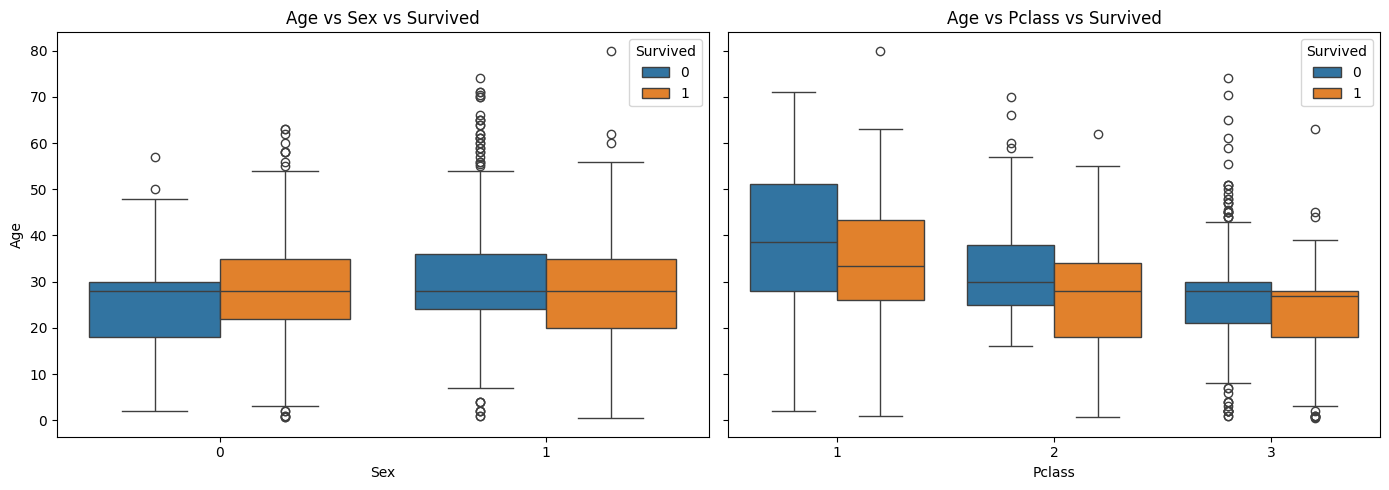

In [200]:
# Three variables (Age with Survived)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
sns.boxplot(data=df, x='Sex', y='Age', hue='Survived', ax=axes[0])
axes[0].set_title('Age vs Sex vs Survived')

sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived', ax=axes[1])
axes[1].set_title('Age vs Pclass vs Survived')

plt.tight_layout()
plt.show()

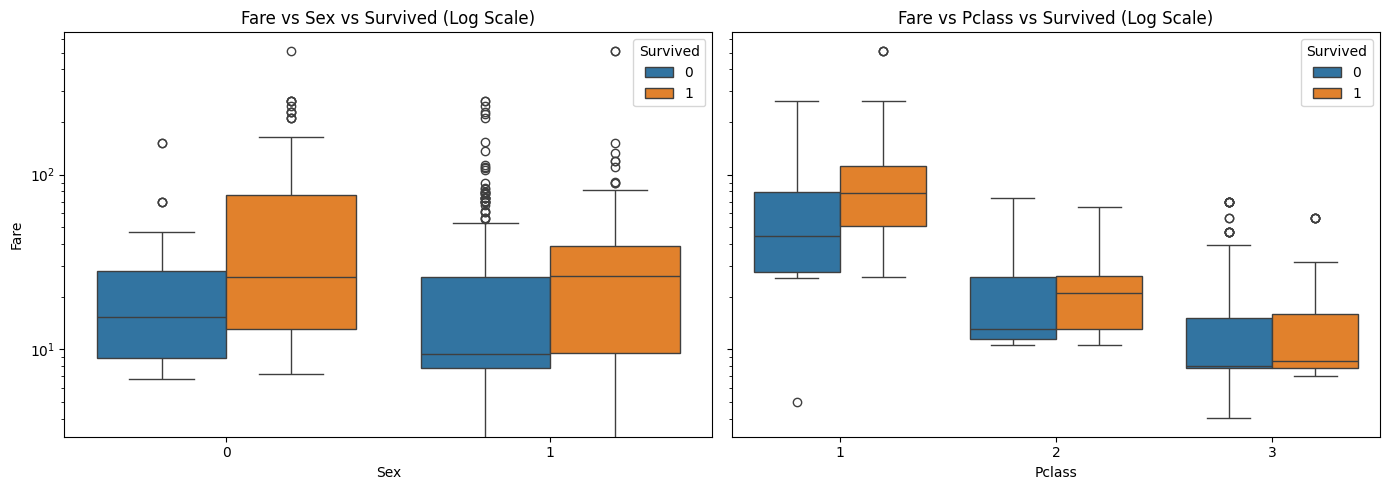

In [201]:
# Three variables (Fare with Survived)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
sns.boxplot(data=df, x='Sex', y='Fare', hue='Survived', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Fare vs Sex vs Survived (Log Scale)')

sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived', ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Fare vs Pclass vs Survived (Log Scale)')

plt.tight_layout()
plt.show()

In [202]:
import numpy as np  # Make sure to import numpy

def removeOutliers(df):
    # Create a new DataFrame to hold the cleaned data
    cleaned_df = df.copy()
    
    # Loop through each numeric column in the DataFrame
    for var in df.select_dtypes(include=[np.number]).columns:
        # Calculate Q1, Q3, and IQR for the column
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the upper and lower bounds for outliers
        high = Q3 + 1.5 * IQR
        low = Q1 - 1.5 * IQR
        
        # Filter the column and keep only values within the bounds
        cleaned_df = cleaned_df[(cleaned_df[var] >= low) & (cleaned_df[var] <= high)]
    
    return cleaned_df


In [203]:
df1 = removeOutliers(df)
print(df1)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin  Embarked
0           0       3    1  22.0      1      0   7.2500    G6         2
2           1       3    0  26.0      0      0   7.9250   C85         2
3           1       1    0  35.0      1      0  53.1000  C123         2
4           0       3    1  35.0      0      0   8.0500  C123         2
5           0       3    1  28.0      0      0   8.4583  C123         1
..        ...     ...  ...   ...    ...    ...      ...   ...       ...
884         0       3    1  25.0      0      0   7.0500   C50         2
886         0       2    1  27.0      0      0  13.0000   C50         2
887         1       1    0  19.0      0      0  30.0000   B42         2
889         1       1    1  26.0      0      0  30.0000  C148         0
890         0       3    1  32.0      0      0   7.7500  C148         1

[577 rows x 9 columns]


### Observations from All Graphs:

1. **Single Variable Boxplots:**
   - **Age:** A few outliers at older ages, with most ages concentrated in the 20-50 range.
   - **Fare:** A large range of fares, with high-value outliers indicating first-class passengers.

2. **Two Variable Boxplots (Age vs. Categories):**
   - **Sex:** Females tend to have a higher survival rate than males across different ages.
   - **Pclass:** First-class passengers (Pclass=1) are more likely to survive compared to second and third-class.
   - **Survived:** Survivors are younger, with a notable difference in age between those who survived vs. those who didn’t.

3. **Two Variable Boxplots (Fare vs. Categories):**
   - **Sex:** Females tend to pay lower fares, but still have higher survival rates.
   - **Pclass:** First-class passengers paid much higher fares, which correlates with higher survival rates.
   - **Survived:** Higher fares correlate with higher survival rates, particularly in first class.

4. **Three Variable Boxplots (Age, Fare vs. Categories and Survival):**
   - **Sex vs. Age & Survival:** Women, particularly younger women, had higher survival rates.
   - **Pclass vs. Age & Survival:** First-class passengers survived at a higher rate, especially in the younger age groups.
   - **Fare vs. Age & Survival:** Higher fare-paying passengers, especially in first-class, had a better chance of survival.

